# Imports

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import time
import pickle
from collections import deque
from pingpong import pingpongRL
import matplotlib.pyplot as plt

In [8]:
alpha=0.01
alpha_decay=0.01
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(24, input_dim=5, activation='tanh')) # input the 5 dimensions of the state
model.add(tf.keras.layers.Dense(48, activation='tanh'))
model.add(tf.keras.layers.Dense(2, activation='linear')) # output the Q-values (value function) for the two actions

optimizer=keras.optimizers.Adam(learning_rate=alpha, decay=alpha_decay)
loss = keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)

In [9]:
state = np.array([[1,1,1,1,0]])

In [10]:
start = time.time()
np.argmax(model.predict(state))
print(time.time()-start)

0.09399867057800293


In [7]:
PATH = "RL/agents/"
time = 1036
mem = pickle.load(open(f"{PATH}mem{210624}_{time}.p", "rb"))
loss = pickle.load(open(f"{PATH}loss{210624}_{time}.p", "rb"))
score = pickle.load(open(f"{PATH}scores{210624}_{time}.p", "rb"))

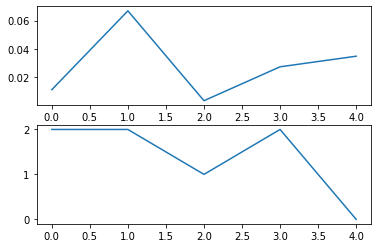

In [12]:
fig, axs = plt.subplots(2,1)
episodes = np.linspace(0,len(loss)-1, len(loss))
ax=axs[0]
ax.plot(episodes, loss)
ax=axs[1]
ax.plot(episodes, score)

In [30]:
episode = [mem[0]]

(array([[200, 200,  10,  -1,  10]]),
 0,
 0,
 array([[190, 199,  20,  -1,  10]]),
 False)

In [37]:
episode = []
for m in mem:
    episode.append(m[0][0])
    if m[4]:
        break

In [40]:
game = pingpongRL.Game()

In [ ]:
game.playback(episode)